## Ellipsoidal Variable Stars  
### SL Morris 1985  
https://ui.adsabs.harvard.edu/abs/1985ApJ...295..143M/abstract  
  
Definition of Ellipsoidal Variable Stars:    
- non eclipsing close binaries whose components may be distorted by mutual gravitation.  
- confirmed candidates have both an RV curve and a double peaked light curve.  
- ambiguous cases: you can simulate a 'grazing eclipse' for the star, there is an eclipse in x-ray data but not optical because the companion is compact.  

## Light Curves
Models of the light curves of ellipsoidal variable stars account for these parameters:   
- u, Limb Darkening
- $\tau$, Gravity Darkening  
- i, inclination  
- q, mass ratio where 1 in primary, 2 is secondary. 
The models are quasi sinusoidal
- assume there are no asymmetries such as the O'Connell effect.  
- assume that variability is due to primary star (usually the bright star) alone
    - Good if the secondary star is faint because its ellipsoidal variability would be washed out by the bright primary.
    - If the stars are similar brightness, you should analyze the system twice, first by modeling one star as the variable and then the other. Then decide which analysis is more realistic.  
    - If this doesn't work, both stars are variable, then simultaneous modeling of the color curves may be needed.
- Assumes that the orbits are circular and they are tidally locked with their spin and orbital axes parallel so that the periods of rotation and revolution are the same. 
    - This is usually true for close binaries. 
    - Even if it isn't, nonsynchronous rotation doesn't change time varying components of luminosity to this degree of approximation. 
    - A small but nonzero eccentricity will only have a negligible effect on the light curve. 
- Assumes that the radiation pressure is too small to alter the Roche-lobe geometry. 
    - The size of roche lobes of early type giants, supergiants, and Of stars can change due to radiation pressure. In this case you would need to do the fourier coefficients more cautiously. 
- Assumes fourier coefficients (C_1(n)) are not influenced by the reflection effect. 
    - This affect can generate out-of-eclipse light variations. 
    - No effect on C(3), 16% effect on C(2), but should be recognizable in the light curve somehow. 
- $L_1(\phi) = \Sigma_{n=0}^3 C_1(n)cos(n\phi)$

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy import constants as const
from astropy import units as u

In [4]:
def Z(n,u1,k1,tau1):
    if n == 2:
        return ((45 + 3*u1) / (20*(3-u1))) * ((1-0.5*k1)*tau1 + 2*k1 + 1)
    if n == 3:
        return ((5*u1)/(32*(3-u1))) * (tau1 + 2)
    print('No valid value for n entered') 
def cosine_coeff(n,q,i,a1,u1,k1,tau1):
    i = np.deg2rad(i)
    if n == 0:
        return 1
    if n == 1: 
        Z3 = Z(3,u1,k1,tau1)
        return 12 * Z3 * q * a1**4 * np.sin(i) - 15 * Z3 * q * a1**4 * np.sin(i)**3
    if n == 2:
        Z2 = Z(2,u1,k1,tau1)
        return -Z2 * q * a1**3 * np.sin(i)**2
    if n == 3: 
        Z3 = Z(3,u1,k1,tau1)
        return -5 * Z3 * q * a1**4 * np.sin(i)**3
    print('No valid value for n entered') 
def light_curve(phi,q,i,a1,u1,k1,tau1):
    L1 = cosine_coeff(1,q,i,a1,u1,k1,tau1)*np.cos(1*phi)
    L2 = cosine_coeff(2,q,i,a1,u1,k1,tau1)*np.cos(2*phi)
    L3 = cosine_coeff(3,q,i,a1,u1,k1,tau1)*np.cos(3*phi)
    return L1 + L2 + L3 

In [36]:
# Let's choose some arbitrary values to play with the model
M1 = 4 * const.M_sun
M2 = 1.4 * const.M_sun
q = M2 / M1 
i = 15 # degrees 
a1 = 0.76 #R_sun
u1 = 0.6 
tau1 = 0.4
k1 = 1 # I could literally not find the equation referenced in the paper :I 

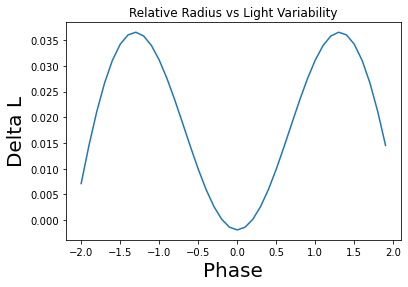

In [37]:
phi = np.arange(-2,2,0.1) # Radians, I looked up light curve vs phase and it's usually this range. 
L = light_curve(phi,q,i,a1,u1,k1,tau1)

plt.figure()
plt.plot(phi,L)
plt.xlabel('Phase',fontsize=20)
plt.ylabel('Delta L',fontsize=20)
plt.title('Relative Radius vs Light Variability');

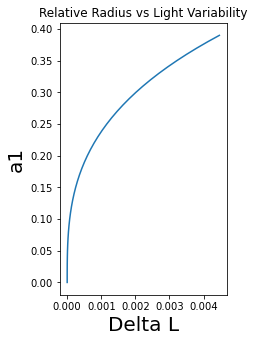

In [34]:
phi1 = 1.5
a1 = np.arange(0,0.4,0.01)
L1 = light_curve(phi1,q,i,a1,u1,k1,tau1)

plt.figure(figsize=(3,5))
plt.plot(L1,a1)
plt.xlabel('Delta L',fontsize=20)
plt.ylabel('a1',fontsize=20)
plt.title('Relative Radius vs Light Variability');

## How to analyze ellipsoidal variation using the light curve model
You need these two things: 
- $\Delta m$: magnitude difference between components (do they mean the mag difference between the two stars?)  
- $\Delta M$: mean difference between maxima and minima in the light curve  

And you can rewrite the C2 fourier coefficient  
- $\frac{qR_1^3sin^2(i)}{A^3} = \frac{3.070\Delta M_1 (3-u1)}{(\tau_1+1)(15+u_1)}$
    - A is the semi major axis
    
These equations may be solved iteratively for: R1, q, A, and i:    
- $R_1 sin(i) = \frac{P v sin(i)}{50.6}$ for a binary in synchronous rotation (not sure why sin(i) doesn't cancel)  
- $A^3/(1+q) = 74.454 M_1 P^2$ From Kepler's third law
- $\frac{q^3 sin^3(i)}{(q+1)^2} = \frac{f}{M_1}$ Mass function for single lined spec binary 

If double lined spec binary:  
- You have values of M1sin^3(i) + M2sin^3(i) in place of the mass function so instead of 4 equations you have 3. 

The gravity darkening coefficient is given by  
- $\tau = \beta \frac{1.43879e8/\lambda T}{1-exp(-1.43879e8/\lambda T)}$
- $\beta$ is 0.25 for early type stars with radiative envelopes, and 0.08 for late type stars with convective envelopes. 

Other things
- k = 0 is safe to use when calculating Z (no explanation why) 
- There's also an equation for if you want to use the generalized potential to describe the potential. rs(a,q) and Omega(rs,q) 
- Some limiting conditions: 
    - L2 = 0, L2 = 0.25 L1